In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
# Exploring Results Folder 
savefolder=r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\TEMP\SP\results'

filelist = sorted(os.listdir(savefolder))
print('{} files in the directory'.format(filelist.__len__()))

x_all = []
y_all = []
z_all = []
rearZ_all = []
mattype_all = []
rearMat_all = []
Wm2Front_all = []
Wm2Back_all = []
pos_all = []
errors_all = []
orientation_all = []
mm_all = []
rr_all = []
CH_all = []
rtr_all = []

timestamplist = [x[10:25] for x in filelist]
orientation = [x[26:28] for x in filelist]
mm = [x[29:31] for x in filelist]
rr = [x[32:34] for x in filelist]
CH = [x[38:41] for x in filelist]
rtr = [x[46:47] for x in filelist]

print("timestamplist", np.unique(timestamplist).tolist())
print("orientation", np.unique(orientation).tolist())
print("Num Rows (indexed on 0)", np.unique(rr).tolist())
print("Num Modules per Row (indexed on 0)", np.unique(mm).tolist())
print("Clearance Heights", np.unique(CH).tolist())
print("Pitches", np.unique(rtr).tolist())



730 files in the directory
timestamplist ['2021-02-21_1200', '2021-12-21_0800', '2021-12-21_0900', '2021-12-21_1000', '2021-12-21_1100', '2021-12-21_1200', '2021-12-21_1300', '2021-12-21_1400', '2021-12-21_1500']
orientation ['EW', 'NS']
Num Rows (indexed on 0) ['01', '02', '03', '04', '05']
Num Modules per Row (indexed on 0) ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
Clearance Heights ['0.6']
Pitches ['8']


## Loading All files into Dataframe

In [3]:
for ii in range(0, len(timestamplist)):

    print("Working on entry "+str(ii)+" filename "+filelist[ii])
    #filename = 'irr_1axis_'+timestamplist[ii]+'_'+orientation[ii]+'_'+mm[ii]+'-'+rr[ii]+'_CH_'+CH[ii]+'_rtr_'+rtr[ii]+'.csv_Row'+str(int(rr[0]))+'_Module'+str(int(mm[0]))+'.csv'

    posSampled = 9*6

    try:
        data = pd.read_csv(os.path.join(savefolder,filelist[ii]))

        # Save all the values
        x_all.append(list(data['x']))
        y_all.append(list(data['y']))
        z_all.append(list(data['z']))
        rearZ_all.append(list(data['rearZ']))
        mattype_all.append(list(data['mattype']))
        rearMat_all.append(list(data['rearMat']))
        Wm2Front_all.append(list(data['Wm2Front']))
        Wm2Back_all.append(list(data['Wm2Back']))

        # Saving position and timestamp for indexing
        pos_all.append(ii)
#            timestamp_all.append(timestamplist[i])

    except:
        print('*** Missing positions ', ii)
        errors_all.append(ii)


df = pd.DataFrame(list(zip(timestamplist,orientation,mm, rr, CH, rtr, x_all,y_all,z_all,rearZ_all,
                           mattype_all,rearMat_all,Wm2Front_all,Wm2Back_all)),
                          columns=['Timestamp', 'Orientation', 'Module', 'Row', 'CH', 'rtr', 'x','y','z','rearZ',
                                   'mattype','rearMat','Wm2Front','Wm2Back'])


df.to_csv('Compiled.csv')

#errorfile = os.path.join(savefolder, 'ERRORS'+withopt+'.txt')
#with open(errorfile, 'w') as f:
#    for s in errors_all:
#        f.write(str(s) + '\n')
print("FINISHED")


Working on entry 0 filename irr_1axis_2021-02-21_1200_EW_01-01_CH_0.6_rtr_8.csv_Row1_Module1.csv
Working on entry 1 filename irr_1axis_2021-02-21_1200_EW_01-02_CH_0.6_rtr_8.csv_Row2_Module1.csv
Working on entry 2 filename irr_1axis_2021-02-21_1200_EW_01-03_CH_0.6_rtr_8.csv_Row3_Module1.csv
Working on entry 3 filename irr_1axis_2021-02-21_1200_EW_01-04_CH_0.6_rtr_8.csv_Row4_Module1.csv
Working on entry 4 filename irr_1axis_2021-02-21_1200_EW_02-01_CH_0.6_rtr_8.csv_Row1_Module2.csv
Working on entry 5 filename irr_1axis_2021-02-21_1200_EW_02-02_CH_0.6_rtr_8.csv_Row2_Module2.csv
Working on entry 6 filename irr_1axis_2021-02-21_1200_EW_02-03_CH_0.6_rtr_8.csv_Row3_Module2.csv
Working on entry 7 filename irr_1axis_2021-02-21_1200_EW_02-04_CH_0.6_rtr_8.csv_Row4_Module2.csv
Working on entry 8 filename irr_1axis_2021-02-21_1200_EW_03-01_CH_0.6_rtr_8.csv_Row1_Module3.csv
Working on entry 9 filename irr_1axis_2021-02-21_1200_EW_03-02_CH_0.6_rtr_8.csv_Row2_Module3.csv
Working on entry 10 filename i

Working on entry 149 filename irr_1axis_2021-12-21_0800_NS_05-04_CH_0.6_rtr_8.csv_Row4_Module5.csv
Working on entry 150 filename irr_1axis_2021-12-21_0800_NS_06-01_CH_0.6_rtr_8.csv_Row1_Module6.csv
Working on entry 151 filename irr_1axis_2021-12-21_0800_NS_06-02_CH_0.6_rtr_8.csv_Row2_Module6.csv
Working on entry 152 filename irr_1axis_2021-12-21_0800_NS_06-03_CH_0.6_rtr_8.csv_Row3_Module6.csv
Working on entry 153 filename irr_1axis_2021-12-21_0800_NS_06-04_CH_0.6_rtr_8.csv_Row4_Module6.csv
Working on entry 154 filename irr_1axis_2021-12-21_0800_NS_07-01_CH_0.6_rtr_8.csv_Row1_Module7.csv
Working on entry 155 filename irr_1axis_2021-12-21_0800_NS_07-02_CH_0.6_rtr_8.csv_Row2_Module7.csv
Working on entry 156 filename irr_1axis_2021-12-21_0800_NS_07-03_CH_0.6_rtr_8.csv_Row3_Module7.csv
Working on entry 157 filename irr_1axis_2021-12-21_0800_NS_07-04_CH_0.6_rtr_8.csv_Row4_Module7.csv
Working on entry 158 filename irr_1axis_2021-12-21_0800_NS_08-01_CH_0.6_rtr_8.csv_Row1_Module8.csv
Working on

Working on entry 317 filename irr_1axis_2021-12-21_1000_NS_07-04_CH_0.6_rtr_8.csv_Row4_Module7.csv
Working on entry 318 filename irr_1axis_2021-12-21_1000_NS_08-01_CH_0.6_rtr_8.csv_Row1_Module8.csv
Working on entry 319 filename irr_1axis_2021-12-21_1000_NS_08-02_CH_0.6_rtr_8.csv_Row2_Module8.csv
Working on entry 320 filename irr_1axis_2021-12-21_1000_NS_08-03_CH_0.6_rtr_8.csv_Row3_Module8.csv
Working on entry 321 filename irr_1axis_2021-12-21_1000_NS_08-04_CH_0.6_rtr_8.csv_Row4_Module8.csv
Working on entry 322 filename irr_1axis_2021-12-21_1000_NS_09-01_CH_0.6_rtr_8.csv_Row1_Module9.csv
Working on entry 323 filename irr_1axis_2021-12-21_1000_NS_09-02_CH_0.6_rtr_8.csv_Row2_Module9.csv
Working on entry 324 filename irr_1axis_2021-12-21_1000_NS_09-03_CH_0.6_rtr_8.csv_Row3_Module9.csv
Working on entry 325 filename irr_1axis_2021-12-21_1000_NS_09-04_CH_0.6_rtr_8.csv_Row4_Module9.csv
Working on entry 326 filename irr_1axis_2021-12-21_1000_NS_10-01_CH_0.6_rtr_8.csv_Row1_Module10.csv
Working o

Working on entry 486 filename irr_1axis_2021-12-21_1200_NS_10-01_CH_0.6_rtr_8.csv_Row1_Module10.csv
Working on entry 487 filename irr_1axis_2021-12-21_1200_NS_10-02_CH_0.6_rtr_8.csv_Row2_Module10.csv
Working on entry 488 filename irr_1axis_2021-12-21_1200_NS_10-03_CH_0.6_rtr_8.csv_Row3_Module10.csv
Working on entry 489 filename irr_1axis_2021-12-21_1200_NS_10-04_CH_0.6_rtr_8.csv_Row4_Module10.csv
Working on entry 490 filename irr_1axis_2021-12-21_1300_EW_01-01_CH_0.6_rtr_8.csv_Row1_Module1.csv
Working on entry 491 filename irr_1axis_2021-12-21_1300_EW_01-02_CH_0.6_rtr_8.csv_Row2_Module1.csv
Working on entry 492 filename irr_1axis_2021-12-21_1300_EW_01-03_CH_0.6_rtr_8.csv_Row3_Module1.csv
Working on entry 493 filename irr_1axis_2021-12-21_1300_EW_01-04_CH_0.6_rtr_8.csv_Row4_Module1.csv
Working on entry 494 filename irr_1axis_2021-12-21_1300_EW_02-01_CH_0.6_rtr_8.csv_Row1_Module2.csv
Working on entry 495 filename irr_1axis_2021-12-21_1300_EW_02-02_CH_0.6_rtr_8.csv_Row2_Module2.csv
Workin

Working on entry 655 filename irr_1axis_2021-12-21_1500_EW_02-02_CH_0.6_rtr_8.csv_Row2_Module2.csv
Working on entry 656 filename irr_1axis_2021-12-21_1500_EW_02-03_CH_0.6_rtr_8.csv_Row3_Module2.csv
Working on entry 657 filename irr_1axis_2021-12-21_1500_EW_02-04_CH_0.6_rtr_8.csv_Row4_Module2.csv
Working on entry 658 filename irr_1axis_2021-12-21_1500_EW_03-01_CH_0.6_rtr_8.csv_Row1_Module3.csv
Working on entry 659 filename irr_1axis_2021-12-21_1500_EW_03-02_CH_0.6_rtr_8.csv_Row2_Module3.csv
Working on entry 660 filename irr_1axis_2021-12-21_1500_EW_03-03_CH_0.6_rtr_8.csv_Row3_Module3.csv
Working on entry 661 filename irr_1axis_2021-12-21_1500_EW_03-04_CH_0.6_rtr_8.csv_Row4_Module3.csv
Working on entry 662 filename irr_1axis_2021-12-21_1500_EW_04-01_CH_0.6_rtr_8.csv_Row1_Module4.csv
Working on entry 663 filename irr_1axis_2021-12-21_1500_EW_04-02_CH_0.6_rtr_8.csv_Row2_Module4.csv
Working on entry 664 filename irr_1axis_2021-12-21_1500_EW_04-03_CH_0.6_rtr_8.csv_Row3_Module4.csv
Working on

## Join Weather Data (DNI, DHI, WSPD, ETC)

In [4]:
df['datetimes'] = pd.to_datetime(df['Timestamp'], format="%Y-%m-%d_%H%M").dt.tz_localize(tz='Etc/GMT+3')
uniquetimes = df['datetimes'].unique()
print(uniquetimes)

<DatetimeArray>
['2021-02-21 12:00:00-03:00', '2021-12-21 08:00:00-03:00',
 '2021-12-21 09:00:00-03:00', '2021-12-21 10:00:00-03:00',
 '2021-12-21 11:00:00-03:00', '2021-12-21 12:00:00-03:00',
 '2021-12-21 13:00:00-03:00', '2021-12-21 14:00:00-03:00',
 '2021-12-21 15:00:00-03:00']
Length: 9, dtype: datetime64[ns, Etc/GMT+3]


In [5]:
import bifacial_radiance
demo = bifacial_radiance.RadianceObj('Sim')  
weatherfile = r'C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals\SAM_SP_WeatherFile.csv'
metdata = demo.readWeatherFile(weatherfile, source='SAM')  

path = C:\Users\sayala\Documents\GitHub\Studies\SouthPole\Journals
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is left-labeled  with a delta of +30 mins. i.e. 12 is 12:30 sunpos.


C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1200: RuntimeWarning: invalid value encountered in remainder
  H0 = np.degrees(np.arccos(cos_arg)) % 180
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1211: RuntimeWarning: invalid value encountered in remainder
  m[1] = m[1] % 1
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1212: RuntimeWarning: invalid value encountered in remainder
  m[2] = m[2] % 1
C:\Users\sayala\Documents\GitHub\pvlib-python\pvlib\spa.py:1229: RuntimeWarning: invalid value encountered in remainder
  Hp = (vs + lon - alpha_prime) % 360


In [6]:
foo2 = pd.DataFrame()
foo2['DNI'] = metdata.dni
foo2['DHI'] = metdata.dhi
foo2['GHI'] = metdata.ghi
foo2['temp_air'] = metdata.temp_air
foo2['wind_speed'] = metdata.wind_speed
foo2['solpos_zenith'] = metdata.solpos.zenith.values
foo2['solpos_azimuth'] = metdata.solpos.azimuth.values
foo2['datetime'] = metdata.datetime
foo2.set_index(foo2.datetime, inplace= True)

In [7]:
df['DNI'] = np.nan
df['DHI'] = np.nan
df['GHI'] = np.nan
df['temp_air'] = np.nan
df['wind_speed'] = np.nan
df['solpos_zenith'] = np.nan
df['solpos_azimuth'] = np.nan

for ii in range (0, len(uniquetimes)):
    df.loc[df.datetimes == uniquetimes[ii],'DNI'] = foo2.loc[uniquetimes[ii]].DNI
    df.loc[df.datetimes == uniquetimes[ii],'DHI'] = foo2.loc[uniquetimes[ii]].DHI
    df.loc[df.datetimes == uniquetimes[ii],'GHI'] = foo2.loc[uniquetimes[ii]].GHI
    df.loc[df.datetimes == uniquetimes[ii],'temp_air'] = foo2.loc[uniquetimes[ii]].temp_air
    df.loc[df.datetimes == uniquetimes[ii],'wind_speed'] = foo2.loc[uniquetimes[ii]].wind_speed
    df.loc[df.datetimes == uniquetimes[ii],'solpos_zenith'] = foo2.loc[uniquetimes[ii]].solpos_zenith
    df.loc[df.datetimes == uniquetimes[ii],'solpos_azimuth'] = foo2.loc[uniquetimes[ii]].solpos_azimuth

## Separate into NS and EW dataframes

In [8]:
NSG = df.loc[df.Orientation == 'NS'].copy()
EWG = df.loc[df.Orientation == 'EW'].copy()
NSG.head(1)

,Timestamp,Orientation,Module,Row,CH,rtr,x,y,z,rearZ,...,Wm2Front,Wm2Back,datetimes,DNI,DHI,GHI,temp_air,wind_speed,solpos_zenith,solpos_azimuth
40,2021-02-21_1200,NS,01,01,0.6,8,"[4.397143, 4.397143, 4.397143, 4.397143, 4.397...","[15.979, 15.979, 15.979, 15.979, 15.979, 15.97...","[2.4, 2.2, 2.0, 1.8, 1.6, 1.4, 1.2, 1.0, 0.8, ...","[2.4, 2.2, 2.0, 1.8, 1.6, 1.4, 1.2, 1.0, 0.8, ...",...,"[575.2191, 572.544, 569.8716, 566.7559, 563.16...","[1171.084, 1167.38, 1163.675, 1163.729, 1158.3...",2021-02-21 12:00:00-03:00,53.253333,801.275,179.88,-50.516667,3.393333,79.662119,335.686411


## Sort Values by Date, Row and Module

In [9]:
NSG = NSG.sort_values(['datetimes', 'Row', 'Module'],
              ascending = [True, True, True])
EWG = EWG.sort_values(['datetimes', 'Row', 'Module'],
              ascending = [True, True, True])

## Calculate POAs

In [10]:
Wm2Front = pd.DataFrame(item for item in NSG['Wm2Front'])
Wm2Back = pd.DataFrame(item for item in NSG['Wm2Back'])

NSG['SouthFacing_POA'] = (Wm2Front+Wm2Back*0.6).mean(axis=1).values
NSG['NorthFacing_POA'] = (Wm2Front*0.6+Wm2Back).mean(axis=1).values
NSG.SouthFacing_POA

Wm2Front = pd.DataFrame(item for item in EWG['Wm2Front'])
Wm2Back = pd.DataFrame(item for item in EWG['Wm2Back'])
EWG['EastFacing_POA'] = (Wm2Front+Wm2Back*0.6).mean(axis=1).values
EWG['WestFacing_POA'] = (Wm2Front*0.6+Wm2Back).mean(axis=1).values

## Asign CEC module 

In [11]:
import pvlib 
CECMODS = pvlib.pvsystem.retrieve_sam('CECMod')
INVERTERS = pvlib.pvsystem.retrieve_sam('CECInverter')

CECMOD_CSI = CECMODS['Canadian_Solar_Inc__CS6X_300P']

## Calculate Performances

In [12]:
NSG['North_Performance'] = bifacial_radiance.performance.calculatePerformance(effective_irradiance = NSG['NorthFacing_POA'], CECMod = CECMOD_CSI,
                                                  temp_air = NSG['temp_air'],
                                                  wind_speed = NSG['wind_speed'],
                                                  glassglass=True)

NSG['South_Performance'] = bifacial_radiance.performance.calculatePerformance(effective_irradiance = NSG['SouthFacing_POA'], CECMod = CECMOD_CSI,
                                                  temp_air = NSG['temp_air'],
                                                  wind_speed = NSG['wind_speed'],
                                                  glassglass=True)

EWG['East_Performance'] = bifacial_radiance.performance.calculatePerformance(effective_irradiance = EWG['EastFacing_POA'], CECMod = CECMOD_CSI,
                                                  temp_air = EWG['temp_air'],
                                                  wind_speed = EWG['wind_speed'],
                                                  glassglass=True)

EWG['West_Performance'] = bifacial_radiance.performance.calculatePerformance(effective_irradiance = EWG['WestFacing_POA'], CECMod = CECMOD_CSI,
                                                  temp_air = EWG['temp_air'],
                                                  wind_speed = EWG['wind_speed'],
                                                  glassglass=True)

In [13]:
# UGLY MAPPING

#x=range(0,len(NSG['NorthFacing_POA']))
#plt.figure(figsize=(18, 6), dpi=80)

#plt.plot(x,  NSG['NorthFacing_POA'], label='North')
#plt.plot(x, NSG['SouthFacing_POA'], label='South')
#x=range(0,len(EWG['EastFacing_POA']))
#plt.plot(x,  EWG['EastFacing_POA'], label='East')
#plt.plot(x, EWG['WestFacing_POA'], 'y', label='West')
#plt.plot(range(45,80), np.ones(80-45)*1286, '.r', label='VF SouthFacing')
#plt.plot(range(85,120), np.ones(120-85)*1495,  '.r')
#plt.plot(range(120,160), np.ones(160-120)*1664,  '.r')
#plt.plot(range(165,190), np.ones(190-165)*1602, '.r')
#plt.plot(range(200,240), np.ones(240-200)*1470, '.r')
#plt.plot(range(250,280), np.ones(280-250)*1193, '.r')
#plt.plot(range(290,310), np.ones(310-290)*531, '.r')
#plt.plot(range(320,360), np.ones(360-320)*449, '.r')
#plt.ylabel("Irradiance [W/m$^2$]")
#plt.legend(loc='lower center', ncol=3)


## WORKING WITH 2021-02-21_1200

In [14]:
Wm2Front = pd.DataFrame(item for item in NSG[NSG['Timestamp'] == '2021-02-21_1200']['Wm2Front'])
Wm2Back = pd.DataFrame(item for item in NSG[NSG['Timestamp'] == '2021-02-21_1200']['Wm2Back'])
SouthF = (Wm2Front+Wm2Back*0.6)
NorthF = (Wm2Front*0.6+Wm2Back)

Wm2Front = pd.DataFrame(item for item in EWG[EWG['Timestamp'] == '2021-02-21_1200']['Wm2Front'])
Wm2Back = pd.DataFrame(item for item in EWG[EWG['Timestamp'] == '2021-02-21_1200']['Wm2Back'])
EastF = (Wm2Front+Wm2Back*0.6)
WestF = (Wm2Front*0.6+Wm2Back)

In [15]:
ii = 0
arrayallN = pd.DataFrame()
arrayallS = pd.DataFrame()
arrayallE = pd.DataFrame()
arrayallW = pd.DataFrame()

for rr in range (0, 4):
    rowallN = pd.DataFrame()
    rowallS = pd.DataFrame()
    rowallE = pd.DataFrame()
    rowallW = pd.DataFrame()

    for mm in range (0, 9):

        ii += 1
        # North
        my_list = NorthF.loc[ii]
        my_list = pd.DataFrame(np.array(my_list).reshape(6,9)).T
        rowallN = pd.concat([rowallN, my_list], axis=1)
        # South
        my_list = SouthF.loc[ii]
        my_list = pd.DataFrame(np.array(my_list).reshape(6,9)).T
        rowallS = pd.concat([rowallS, my_list], axis=1)
        # East
        my_list = EastF.loc[ii]
        my_list = pd.DataFrame(np.array(my_list).reshape(6,9)).T
        rowallE = pd.concat([rowallE, my_list], axis=1)
        # West
        my_list = WestF.loc[ii]
        my_list = pd.DataFrame(np.array(my_list).reshape(6,9)).T
        rowallW = pd.concat([rowallW, my_list], axis=1)
    arrayallN = pd.concat([arrayallN, rowallN], axis=0, sort=False, ignore_index=True)
    arrayallS = pd.concat([arrayallS, rowallS], axis=0, sort=False, ignore_index=True)
    arrayallE = pd.concat([arrayallE, rowallE], axis=0, sort=False, ignore_index=True)
    arrayallW = pd.concat([arrayallW, rowallW], axis=0, sort=False, ignore_index=True)

In [16]:
maxmax = np.max([arrayallN.max().max(),
arrayallS.max().max(),
arrayallE.max().max(),
arrayallW.max().max()])

minmin = np.min([arrayallN.min().min(),
arrayallS.min().min(),
arrayallE.min().min(),
arrayallW.min().min()])

print("Max Irradiance in the 4 arrays: ", np.round(maxmax))
print("Min Irradiance in the 4 arrays: ", np.round(minmin))

Max Irradiance in the 4 arrays:  1522.0
Min Irradiance in the 4 arrays:  989.0


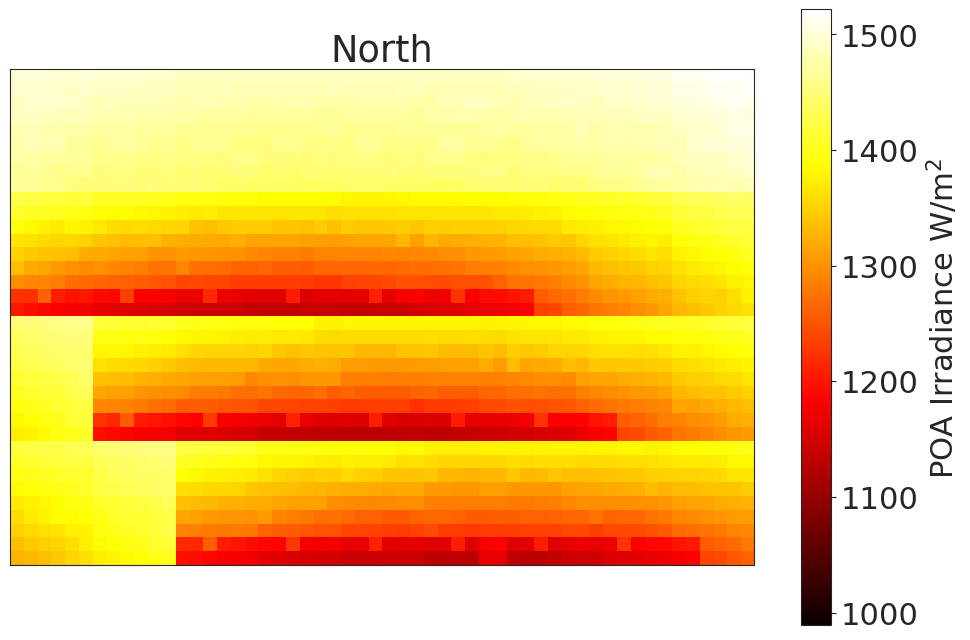

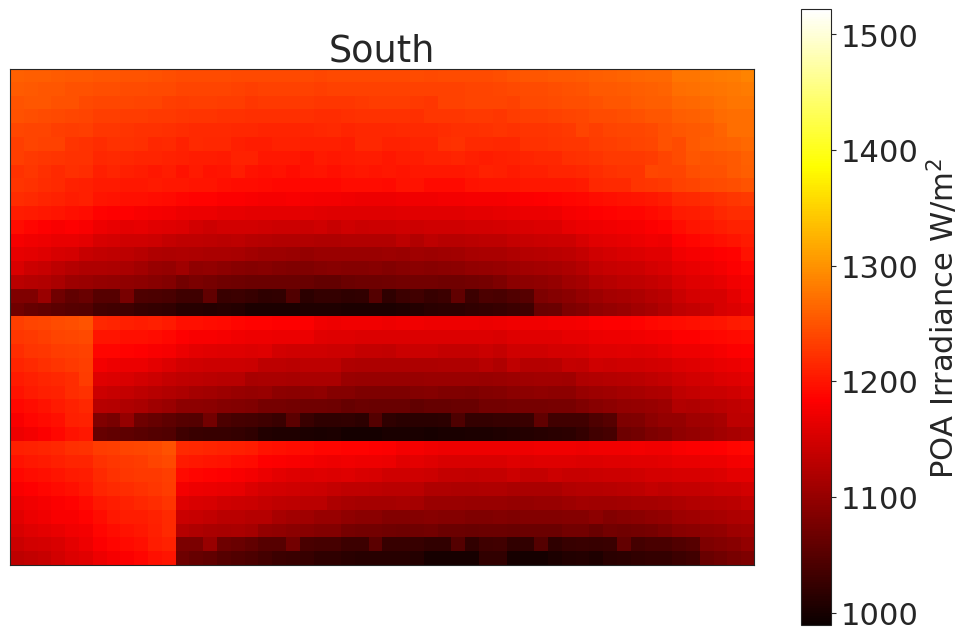

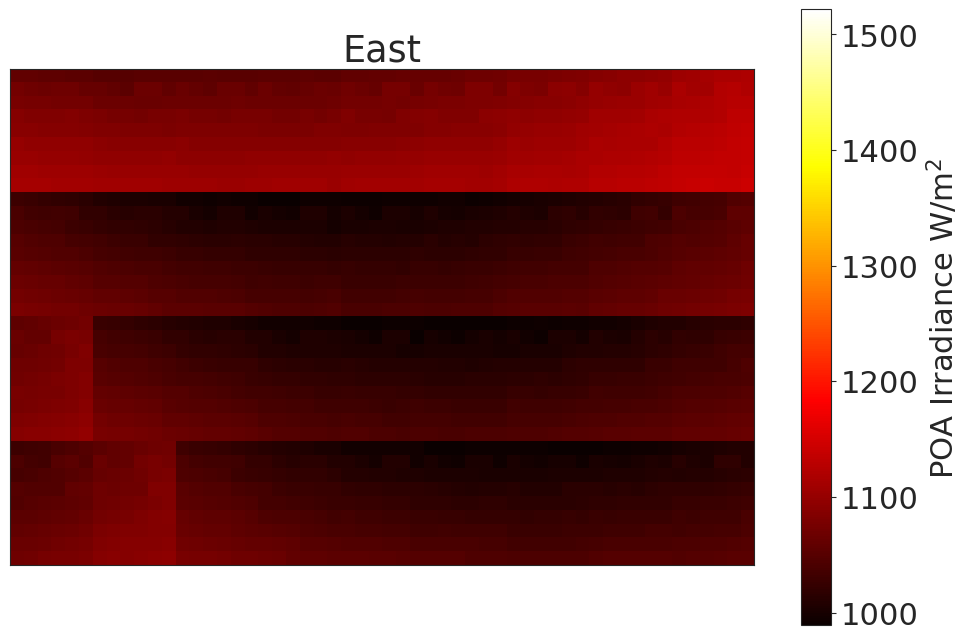

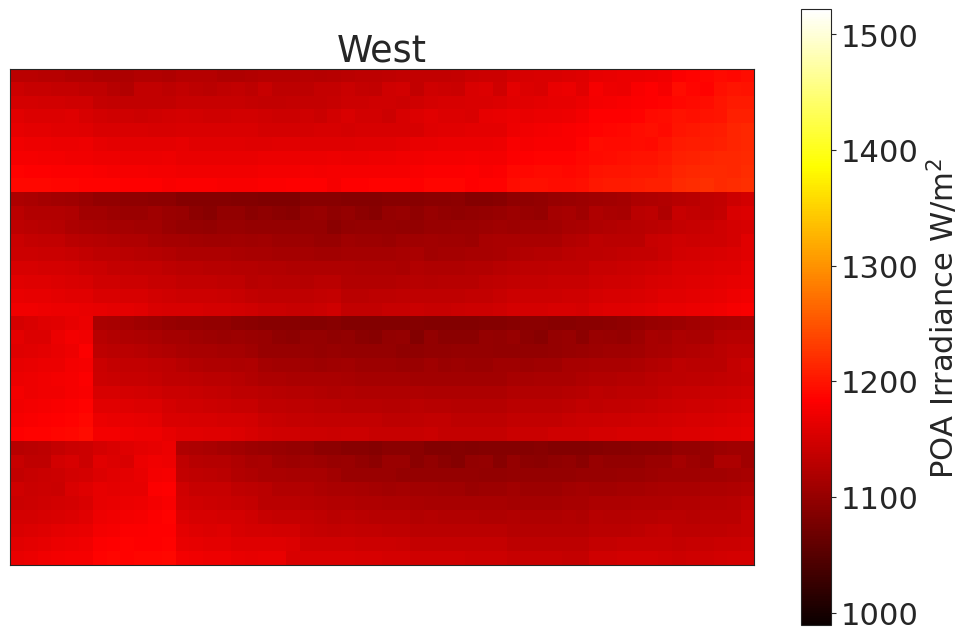

In [17]:
# Printing POA_t (Gfront + Grear*bifaciality)) on each Cell

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

df = arrayallN

with sns.axes_style("white"):
    fig = plt.imshow(df, cmap='hot', vmin=minmin, vmax=maxmax, interpolation='none', aspect = 1)
    plt.colorbar(label='POA Irradiance W/m$^2}$')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)
plt.title("North")    
plt.show()

plt.figure()

df = arrayallS


with sns.axes_style("white"):
    fig = plt.imshow(df, cmap='hot', vmin=minmin, vmax=maxmax, interpolation='none', aspect = 1)
    plt.colorbar(label='POA Irradiance W/m$^2}$')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)
plt.title("South")        
plt.show()

plt.figure()

df = arrayallE


with sns.axes_style("white"):
    fig = plt.imshow(df, cmap='hot', vmin=minmin, vmax=maxmax, interpolation='none', aspect = 1)
    plt.colorbar(label='POA Irradiance W/m$^2}$')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)
plt.title("East")        
plt.show()

plt.figure()

df = arrayallW

with sns.axes_style("white"):
    fig = plt.imshow(df, cmap='hot', vmin=minmin, vmax=maxmax, interpolation='none', aspect = 1)
    plt.colorbar(label='POA Irradiance W/m$^2}$')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)
plt.title("West")        
plt.show()

# MAP PERFORMANCES

In [18]:
ii = 0
PowerallN = []
PowerallS = []
PowerallE = []
PowerallW = []

for rr in range (0, 4):
    rowallN = []
    rowallS = []
    rowallE = []
    rowallW = []

    for mm in range (0, 10):
        ii += 1
        rowallN.append(NSG['North_Performance'].iloc[ii])
        rowallS.append(NSG['South_Performance'].iloc[ii])
        rowallE.append(EWG['East_Performance'].iloc[ii])
        rowallW.append(EWG['West_Performance'].iloc[ii])

    PowerallN.append(rowallN)
    PowerallS.append(rowallS)
    PowerallE.append(rowallE)
    PowerallW.append(rowallW)

PowerallN = pd.DataFrame(PowerallN)
PowerallS = pd.DataFrame(PowerallS)
PowerallE = pd.DataFrame(PowerallE)
PowerallW = pd.DataFrame(PowerallW)

In [19]:
A = [PowerallN.max().max(),
PowerallS.max().max(),
PowerallE.max().max(),
PowerallW.max().max()]

B = [PowerallN.min().min(),
PowerallS.min().min(),
PowerallE.min().min(),
PowerallW.min().min()]

print("Power Mismatch in each array", np.round(np.subtract(A, B)*100/A))
print("Max Power in each array", np.round(A))
print("Min Power in each array", np.round(B))

Power Mismatch in each array [12. 11. 12. 12.]
Max Power in each array [492. 431. 410. 416.]
Min Power in each array [434. 385. 362. 368.]


In [20]:
nameplate_array = 300*40
print("Power Array Nameplate ", np.round(nameplate_array/1000,1), " kW")
print("Power Array N S E W ", np.round(np.multiply(B,40/1000),1), " kW")
print("PR Array N S E W", np.round(np.multiply(B,40/nameplate_array),2))

Power Array Nameplate  12.0  kW
Power Array N S E W  [17.4 15.4 14.5 14.7]  kW
PR Array N S E W [1.45 1.28 1.21 1.23]


In [21]:
# Printing Timestamp Data
print(NSG.iloc[0]['Timestamp'])
print("--------------------------")
print("solpos_zenith", np.round(NSG.iloc[0]['solpos_zenith'],1))
print("solpos_azimuth", np.round(NSG.iloc[0]['solpos_azimuth'],1))
print("DNI", np.round(NSG.iloc[0]['DNI'],1))
print("DHI", np.round(NSG.iloc[0]['DHI'],1))
print("GHI", np.round(NSG.iloc[0]['GHI'],1))
print("wind_speed", np.round(NSG.iloc[0]['wind_speed'],1))
print("temp_air", np.round(NSG.iloc[0]['temp_air'],1))

2021-02-21_1200
--------------------------
solpos_zenith 79.7
solpos_azimuth 335.7
DNI 53.3
DHI 801.3
GHI 179.9
wind_speed 3.4
temp_air -50.5


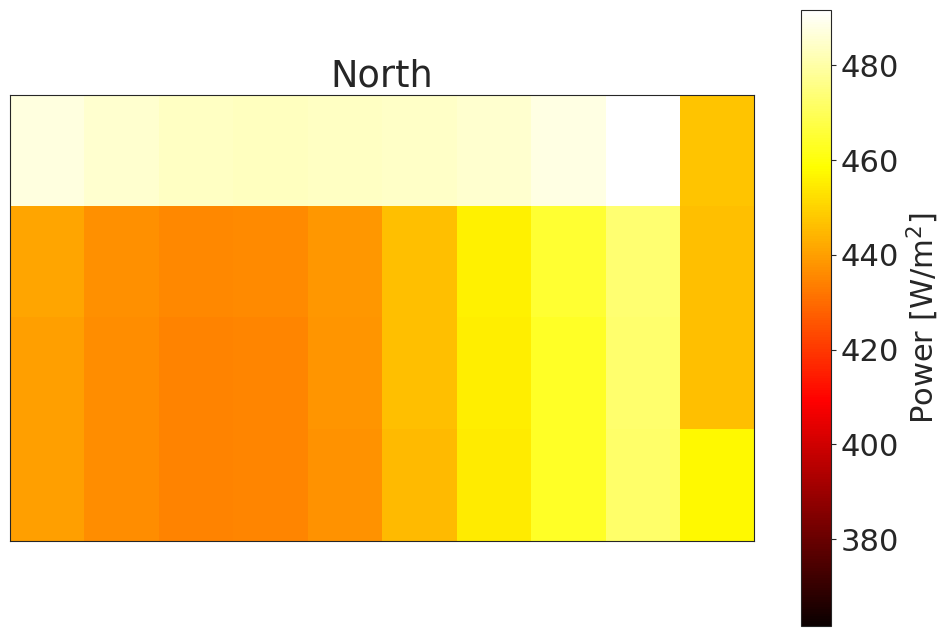

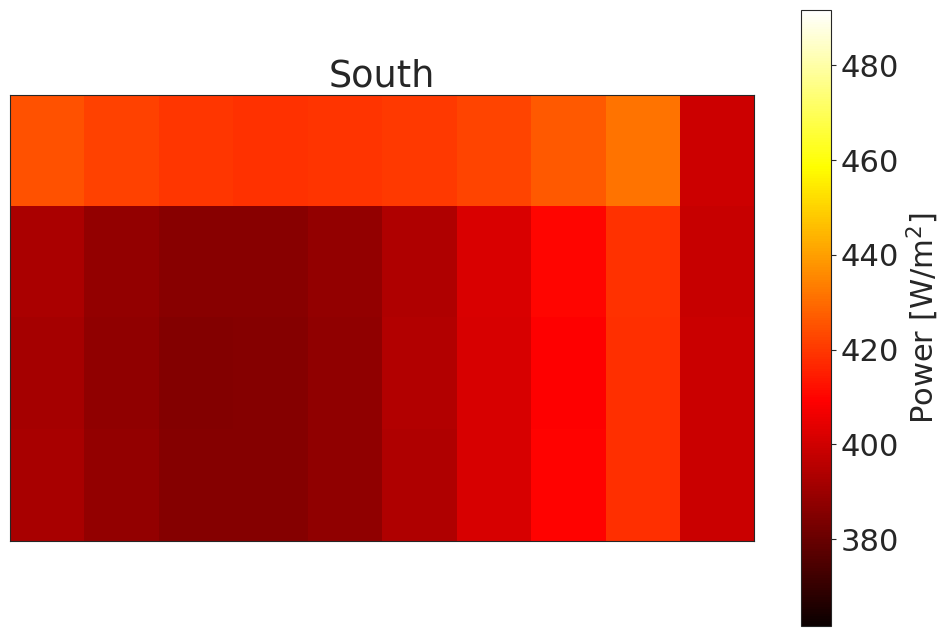

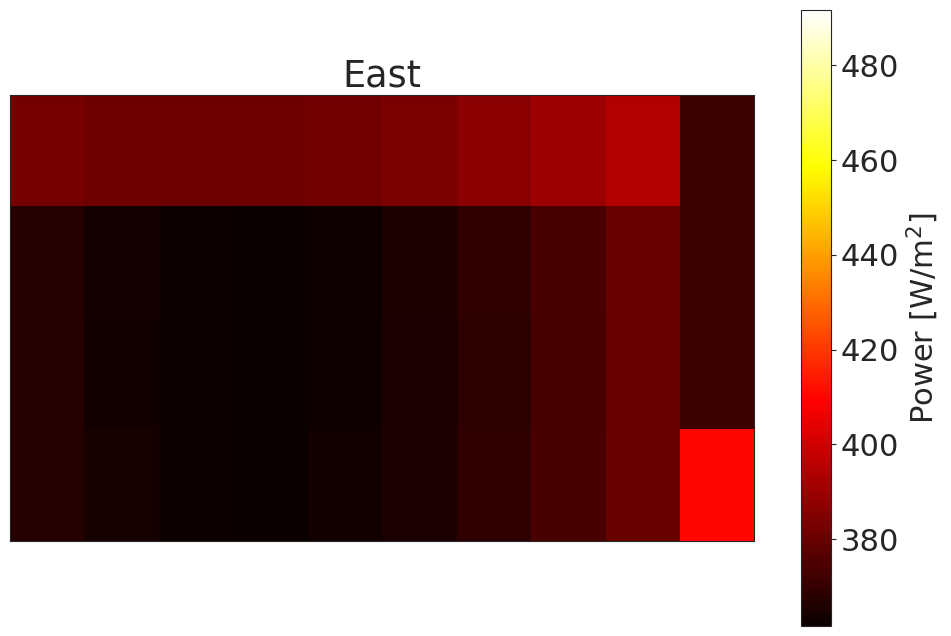

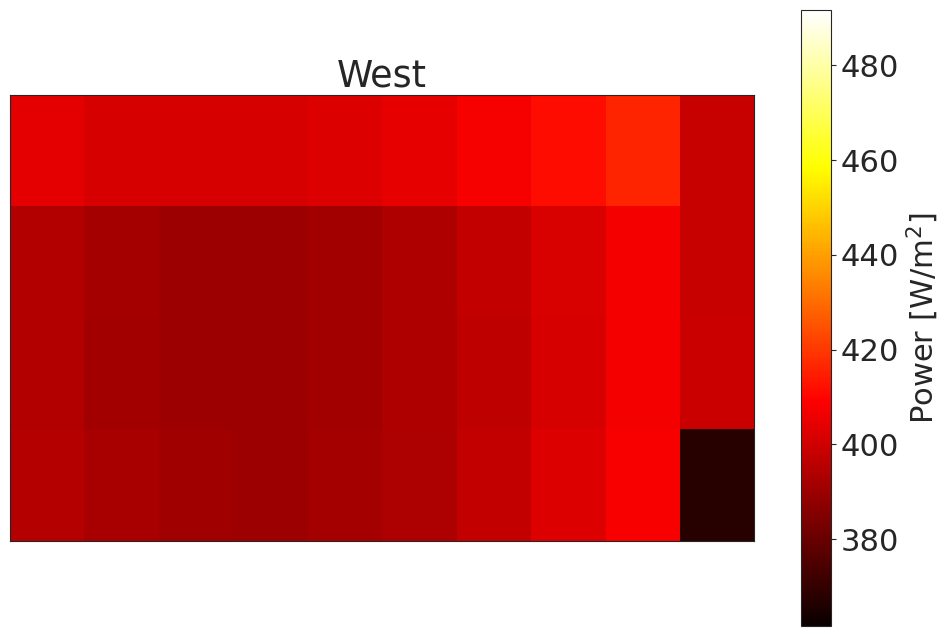

In [23]:
# Plotting Performance
df = PowerallN
maxmax = np.max(A)
minmin = np.min(B)

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)


with sns.axes_style("white"):
    fig = plt.imshow(df, cmap='hot', vmin=minmin, vmax=maxmax, interpolation='none', aspect = 1.5)
    plt.colorbar(label='Power [W/m$^2$]')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)
plt.title("North")   
plt.show()

plt.figure()

df = PowerallS

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)


with sns.axes_style("white"):
    fig = plt.imshow(df, cmap='hot', vmin=minmin, vmax=maxmax, interpolation='none', aspect =  1.5)
    plt.colorbar(label='Power [W/m$^2$]')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)
plt.title("South")   

plt.show()

plt.figure()

df = PowerallE

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)


with sns.axes_style("white"):
    fig = plt.imshow(df, cmap='hot', vmin=minmin, vmax=maxmax, interpolation='none', aspect =  1.5)
    plt.colorbar(label='Power [W/m$^2$]')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)
plt.title("East")   

plt.show()

plt.figure()

df = PowerallW

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)


with sns.axes_style("white"):
    fig = plt.imshow(df, cmap='hot', vmin=minmin, vmax=maxmax, interpolation='none', aspect =  1.5)
    plt.colorbar(label='Power [W/m$^2$]')
    #plt.title('Yearly Bifacial, in matrix form')
    fig.axes.get_yaxis().set_visible(False)
    fig.axes.get_xaxis().set_visible(False)
plt.title("West")   
plt.show()